#Kamal's Code:


In [0]:
from random import randint, choice
from pprint import pprint
from itertools import permutations
from math import inf as oo # Infinity (∞) is larger than any number
from math import sqrt
from time      import time
import matplotlib.pyplot as plt
import copy

In [0]:
MAX_DISTANCE = 100

def random_symmetric_graph(n):
    ''' Symmetric adjacency matrix of size nxn '''
    dist_matrix = [[oo for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(i+1,n):
            v = randint(1,MAX_DISTANCE)
            dist_matrix[i][j] = v
            dist_matrix[j][i] = v
    return dist_matrix

def random_euclidean_graph(n):
    ''' Symmetric adjacency matrix of a Euclidean graph of size nxn '''
    dist_matrix = [[oo for _ in range(n)] for _ in range(n)]
    points = []
    for p in range(n):
        x,y = randint(0,MAX_DISTANCE), randint(0,MAX_DISTANCE)
        points.append((x,y))
    for i in range(n):
        p1 = points[i]
        for j in range(i+1,n):
            p2 = points[j]
            distance = sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
            dist_matrix[i][j] = distance
            dist_matrix[j][i] = distance
    return dist_matrix

def show(G):
    ''' Show adjacency matrix. Useful for debugging. '''
    n = len(G)
    r = "     "
    for i in range(n):
        r += f'{i:4}'
    r += '\n    -'+'-'*(4*n)+'\n'
    for i in range(n):
        r += f'{i:2} | '
        for j in range(n):
            r += f'{G[i][j]:4}'
        r += '\n'
    r = r.replace('inf', '  ∞')
    print(r)

def cost(G, cycle):
    ''' Calculate the cost of the given cycle '''
    c = 0
    n = len(G)
    for i in range(n):
        a = cycle[i]
        b = cycle[(i+1)%n]
        c += G[a][b]
    return c
    
def greedy_nearest_neighbours(G):
    H = copy.deepcopy(G) # We need the original G. We work on/modify H
    n = len(H)
    cities = list(range(n))
    cycle = [] # solution to be built
    city = 0 # Start city
    while len(cities)>0:
        # Find nearest neighbour
        city_neighbours = H[city]
        smallest_distance = min(city_neighbours)
        nearest_city = city_neighbours.index(smallest_distance)
        # Update 'cycle' and 'cities' and H then 'city'
        cycle.append(city)
        cities.remove(city)
        for i in range(n): # 'city' is not to be used again!
            H[city][i] = oo
            H[i][city] = oo
        city = nearest_city
    return cycle

def exhaustive_search(G):
    n = len(G)    
    best_cost = oo # infinity
    best_cycle = []
    for cycle in permutations(range(1,n)): # permutations of [1,2,...,n-1]
        cycle=[0]+list(cycle)              # add the starting city: 0
        c = cost(G, cycle)
        if c < best_cost:
            best_cost = c
            best_cycle = cycle
    return best_cycle

# Best Algorithm TSP, ref: https://github.com/dmishin/tsp-solver

In [0]:
from tsp_solver.greedy import solve_tsp

# Creating Dataset 


In [0]:
graphList = []
for i in range(2, 201): # Create 100 graphs of sizes [2,101]
    for j in range(25): # do it 25 times each
        graphList.append(random_euclidean_graph(i))

# Utility Functions

In [0]:
def get_percentage_delta(graphList, allCosts1, allCosts2):
    """ allSolutions = [(solution0, solution1), ...]
        solution0 being always the correct one"""

    costTotal1 = 0
    costTotal2 = 0 
    percentageDelta = []
    currentSize = 2 #always start at length 2

    for cost1, cost2, graph in zip(allCosts1, allCosts2, graphList):
        if len(graph) == currentSize: #so we average the same size graphs
            costTotal1 += cost1
            costTotal2 += cost2
        else:
            percentageDelta.append(costTotal1 / costTotal2 * 100)
            costTotal1 = 0
            costTotal2 = 0 
            currentSize = len(graph) #advance onto the next size

    return percentageDelta

In [0]:
def get_solutions_costs_times(tsp_function, graphList, maxTime=oo):

    allSolutions= []
    allCosts = []
    allTimes = []
    for graph in graphList: #looping over graphs
        start = time()
        pathAlgorithm = tsp_function(graph)
        totalTime = time() - start
        allSolutions.append(pathAlgorithm)
        allCosts.append(cost(graph, pathAlgorithm))
        allTimes.append(totalTime)
        if maxTime < totalTime:
            break

    return allSolutions, allCosts, allTimes

In [0]:
def filter_costs_times(solutions, costs, times):

    filteredTimes = []
    filteredCosts = []
    timeTotal = 0
    costTotal = 0
    averageCounter = 0
    currentSize = 2 #always start at length 2
    for solution, cost, time in zip(solutions, costs, times):
        if len(solution) == currentSize: #so we average the same size graphs
            timeTotal += time
            costTotal += cost
            averageCounter += 1
        else:
            filteredTimes.append(timeTotal / averageCounter)
            filteredCosts.append(costTotal / averageCounter)
            timeTotal = 0
            costTotal = 0
            averageCounter = 0
            currentSize = len(solution) #advance onto the next size

    return filteredCosts, filteredTimes

# Computing solutions for TSP-Solver, GreedyNN, Exhaustive

In [0]:
sol1, cost1, time1 = get_solutions_costs_times(solve_tsp, graphList)
sol2, cost2, time2 = get_solutions_costs_times(greedy_nearest_neighbours, graphList)

filter_cost_tsp, filter_time_tsp = filter_costs_times(sol1, cost1, time1)
filter_cost_gnn, filter_time_gnn = filter_costs_times(sol2, cost2, time2)

In [0]:
sol3, cost3, time3 = get_solutions_costs_times(exhaustive_search, graphList, maxTime=3)
filter_cost_exhaus, filter_time_exhaus = filter_costs_times(sol3, cost3, time3)


# Quality (200c): GreedyNN vs TSP-Solver


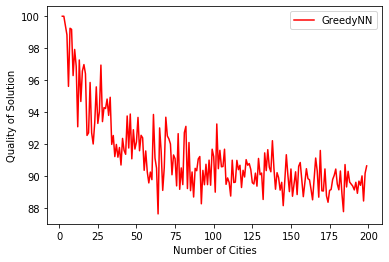

In [82]:
percentageDelta = get_percentage_delta(graphList, cost1, cost2)

plt.plot(range(2, 200) , percentageDelta, 'r', label="GreedyNN")
plt.xlabel("Number of Cities")
plt.ylabel("Quality of Solution")
plt.legend()
plt.show()

## Cost (200c): TSP-Solver vs GreedyNN

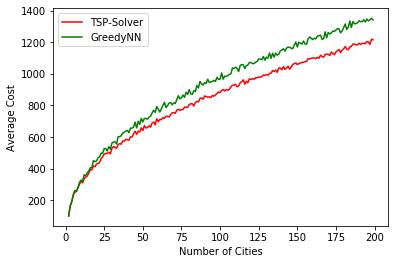

In [83]:
plt.plot(range(2, 200) , filter_cost_tsp, 'r', label="TSP-Solver")
plt.plot(range(2, 200) , filter_cost_gnn, 'g', label="GreedyNN")
plt.xlabel("Number of Cities")
plt.ylabel("Average Cost")
plt.legend()
plt.show()

# Cost (20c): TSP-Solver vs Exhaustive vs GreedyNN 

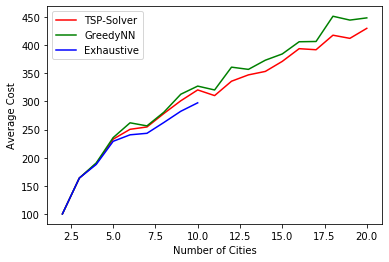

In [84]:
plt.plot(range(2, 21) , filter_cost_tsp[:19], 'r', label="TSP-Solver")
plt.plot(range(2, 21) , filter_cost_gnn[:19], 'g', label="GreedyNN")
plt.plot(range(2, 11) , filter_cost_exhaus, 'b', label="Exhaustive")
plt.xlabel("Number of Cities")
plt.ylabel("Average Cost")
plt.legend()
plt.show()

## Time (20c): GreedyNN vs Exhaustive

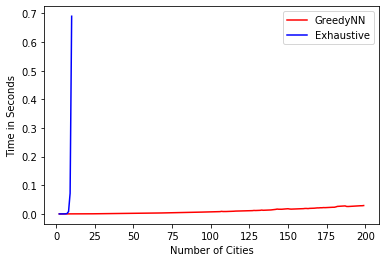

In [85]:
plt.plot(range(2, 21) , filter_time_gnn[:19], 'r', label="GreedyNN")
plt.plot(range(2, 11) , filter_time_exhaus, 'b', label="Exhaustive")
plt.xlabel("Number of Cities")
plt.ylabel("Time in Seconds")
plt.legend()
plt.show()

# Time (200c): GreedyNN vs TSP-Solver


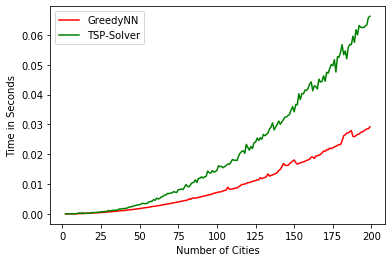

In [86]:
plt.plot(range(2, 200) , filter_time_gnn, 'r', label="GreedyNN")
plt.plot(range(2, 200) , filter_time_tsp, 'g', label="TSP-Solver")
plt.xlabel("Number of Cities")
plt.ylabel("Time in Seconds")
plt.legend()
plt.show()